### Warning 무시

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 데이터 로드

In [32]:
import pandas as pd
import numpy as np

test_y_df = pd.read_csv("./datasets/titanic_gender_submission.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")
train_df = pd.read_csv("./datasets/titanic_train.csv")

### Feature Selection

In [33]:
train = train_df[['Pclass' , 'Sex' , 'Age' ,'Survived']]
test = test_df[['Pclass' , 'Sex' , 'Age' ]]
test_y = test_y_df['Survived']

### 결측치 확인 및 제거

In [36]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [37]:
train = train.dropna(axis=0)

In [38]:
train.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

### Sex 컬럼 숫자로 변환(LabelEncoding)

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])

In [40]:
train['Sex'] = data
train

,Pclass,Sex,Age,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0
...,...,...,...,...
885,3,0,39.0,0
886,2,1,27.0,0
887,1,0,19.0,1
889,1,1,26.0,1


### Age 컬럼 정규화(Age Scaling)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[['Age']])
data = scaler.transform(train[['Age']])

train['Age'] = data
train

,Pclass,Sex,Age,Survived
0,3,1,0.271174,0
1,1,0,0.472229,1
2,3,0,0.321438,1
3,1,0,0.434531,1
4,3,1,0.434531,0
...,...,...,...,...
885,3,0,0.484795,0
886,2,1,0.334004,0
887,1,0,0.233476,1
889,1,1,0.321438,1


### LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()

lr.fit(X, y)

LogisticRegression()

### Test Data Preprocessing 

In [51]:
# 결측치 제거
test = test.fillna(np.mean(test['Age']))

# 문자를 숫자로 변환
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex'] = data

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test[['Age']])
data = scaler.transform(test[['Age']])
test['Age'] = data

test

,Pclass,Sex,Age
0,3,1,0.452723
1,3,0,0.617566
2,2,1,0.815377
3,3,1,0.353818
4,3,0,0.287881
...,...,...,...
413,3,1,0.396975
414,1,0,0.512066
415,3,1,0.505473
416,3,1,0.396975


In [55]:
# 예상
pred = lr.predict(test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [56]:
# 실제
test_y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [61]:
accuracy_score(test_y, pred)

0.9425837320574163

------------------------------------

## Accuracy_score,  Recall_score,  Precision_score,  F1_score,  Confusion_matrix

### sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [54]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [59]:
def get_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)


    print(f'혼동행렬은 : {matrix}')
    print(f'정확도 : {accuracy}, 재현율 : {recall}, 정밀도 : {precision}, f1스코어: {f1score}')

In [60]:
get_eval(test_y, pred)

혼동행렬은 : [[252  14]
 [ 10 142]]
정확도 : 0.9425837320574163, 재현율 : 0.9342105263157895, 정밀도 : 0.9102564102564102, f1스코어: 0.922077922077922


----------------------------------------------------

### 

In [62]:
pred_proba = lr.predict_proba(test)
pred = lr.predict(test)

In [65]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [68]:
pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [71]:
result = pred_proba[ : , 1]

In [73]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y, result)

In [80]:
print(len(precisions))
print(len(recalls))
print(len(thresholds))

196
196
195


In [77]:
import matplotlib.pyplot as plt

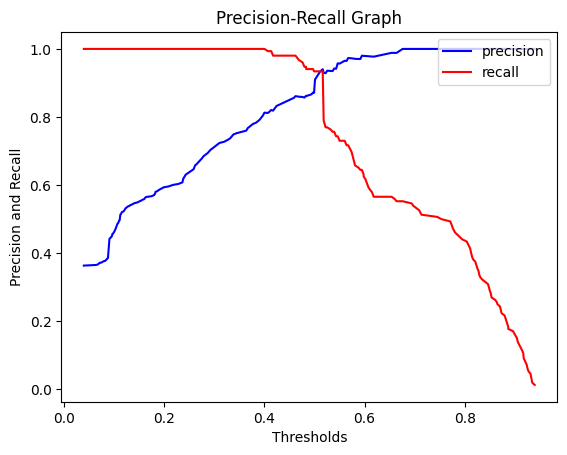

In [83]:
plt.title("Precision-Recall Graph")
plt.xlabel("Thresholds")
plt.ylabel("Precision and Recall")
plt.plot(thresholds, precisions[:195], "b", label = "precision")
plt.plot(thresholds, recalls[:195], "r", label = "recall")
plt.legend(loc = "upper right")
plt.show()